# Good indexes theory
This is just a brief notebook where the calculations to test the **good indexes theory** is reflected. 

The idea is that when you use a random initialization of the weight matrix $w$ what will happen is tha the ones get allocated with weight bigger than Kr will be the ones conncted. F

Furthermore the connection between 0 -> 1, good indexes -> 2 will hold

In [6]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

plt.rcParams["figure.figsize"] = (16, 12)

In [2]:
from network import MinaNetwork

## Simple example

In [3]:
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 35.0   # Input - C3 connection
b = 35.0   # Input - C1 connection
Kr = 0.6  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.7  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 10.0

# Training parameters
sequence = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 200
verbose = False


nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

In [4]:
aux = nn.GC3 * np.dot(nn.w, nn.patterns_dictionary[0])
good_indexes = np.where(aux > Kr)[0]
bad_indexes = np.where(aux <= Kr)[0]

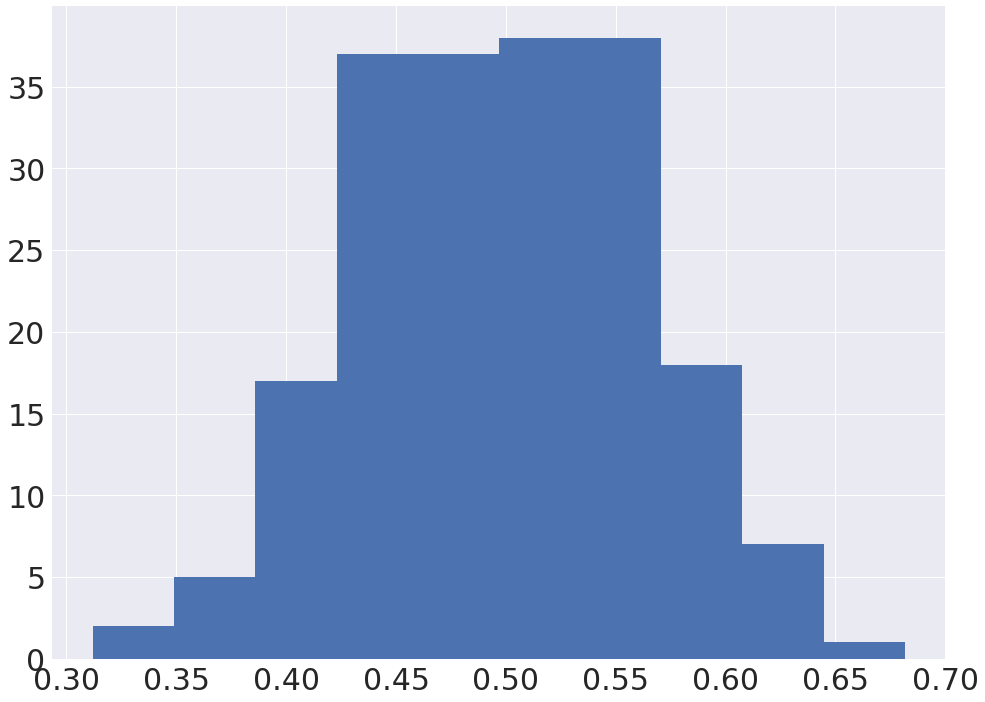

In [8]:
plt.hist(aux);

The indexes of teh patterns left to Kr (0.6) are the indexes that are going to be activated by the pattern number 0 (cue)

Let's try the system, if the theory is true then there should be positive connectivity from 0 to good indexes

In [9]:
quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence, verbose=verbose, save_quantities=False)

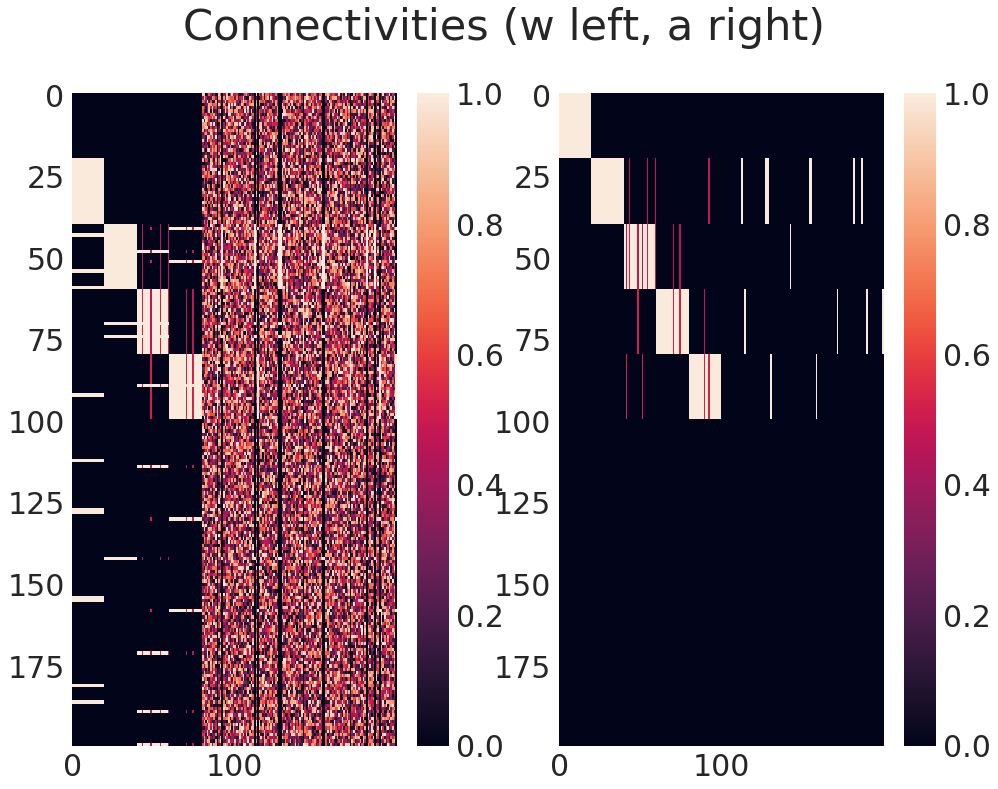

In [12]:
nn.plot_weight_matrices()

In [10]:
nn.w[good_indexes, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Furthermore, there should be positive connections from good indexes to 2  (1, good indexes) -> 2

In [16]:
nn.w[nn.neurons_per_pattern * 2 + 1, good_indexes]

array([ 1.        ,  1.        ,  0.47368421,  0.47368421,  0.47368421,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

Which holds